In [21]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('data/test.jpeg')
# image = cv2.imread('data/test2.jpg')


# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to binarize the image
_, thresholded = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite('thresholded.png', thresholded)

 

True

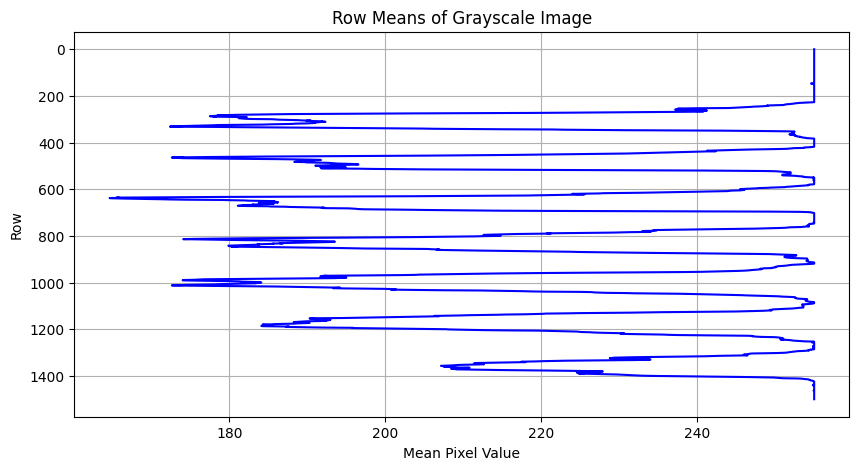

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image_path = "thresholded.png"  # Replace with your image file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Get image dimensions
height, width = image.shape

# Initialize an empty array to store the row means
row_means = []

# Loop through each row of the image and calculate the mean
for i in range(height):
    row = image[i, :]
    mean = np.mean(row)
    row_means.append(mean)

# Create a plot of the row means
plt.figure(figsize=(10, 5))
plt.plot(row_means, range(height), color='b')
plt.title("Row Means of Grayscale Image")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Row")
plt.gca().invert_yaxis()
plt.grid()
plt.show()


In [26]:
import cv2
import numpy as np

# Read the grayscale image
image_path = "thresholded.png"  # Replace with your image file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set the threshold value
threshold = 250

# Get image dimensions
height, width = image.shape

# Initialize variables to keep track of segment start and end
segment_start = None
segment_end = None

# Create a list to store the segments
segments = []

for row in range(height):
    row_mean = np.mean(image[row, :])
    
    # Check if the row mean is greater than the threshold
    if row_mean < threshold and segment_start is None:
        segment_start = row
    elif row_mean >= threshold and segment_start is not None:
        segment_end = row
        if segment_end - segment_start > 0:
            segment = image[segment_start - 20 :segment_end + 20, :]
            segments.append(segment)
        segment_start = None

# Save each segment to a separate file
for i, segment in enumerate(segments):
    segment_filename = f"data/segment_{i}.png"
    cv2.imwrite(segment_filename, segment)

print(f"Found {len(segments)} segments.")


Found 7 segments.
